In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/predictions030.tsv', sep="\t")
print(df)

    project_ids  sample_ids genders  doses  target  prediction  \
0     SRP161461  SRR7817611    male      0       0           0   
1     SRP161461  SRR7817612    male      0       0           0   
2     SRP161461  SRR7817614    male      0       0           0   
3     SRP161461  SRR7817615    male      0       0           0   
4     SRP161461  SRR7817616    male      0       0           0   
..          ...         ...     ...    ...     ...         ...   
215   SRP090688  SRR4317656    male     30       1           1   
216   SRP090688  SRR4317657    male     30       1           1   
217   SRP090688  SRR4317658    male     30       1           1   
218   SRP090688  SRR4317659    male     30       1           1   
219   SRP090688  SRR4317660    male     30       1           1   

     confidence_class_0  confidence_class_1  
0              0.999996            0.000004  
1              0.999993            0.000007  
2              0.999991            0.000009  
3              0.999968

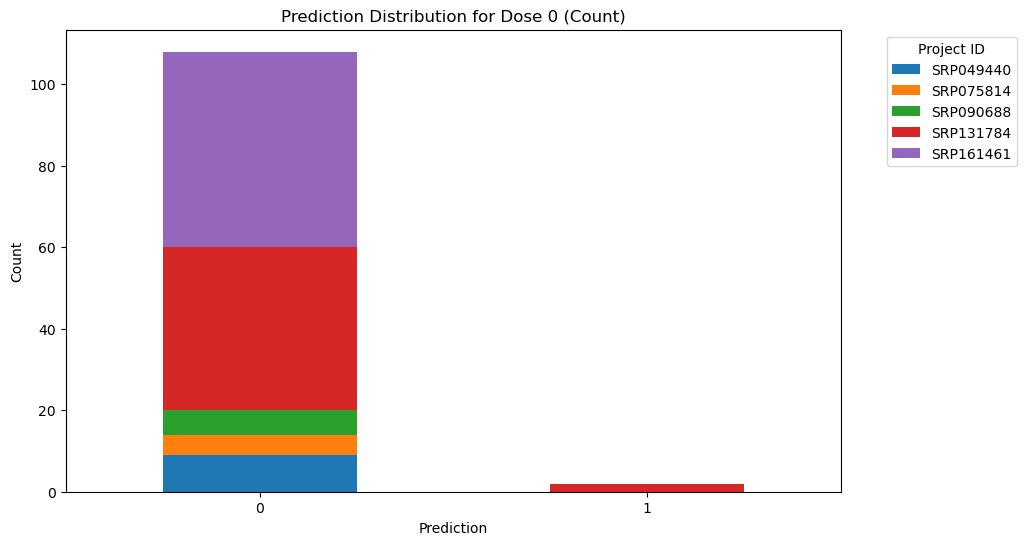

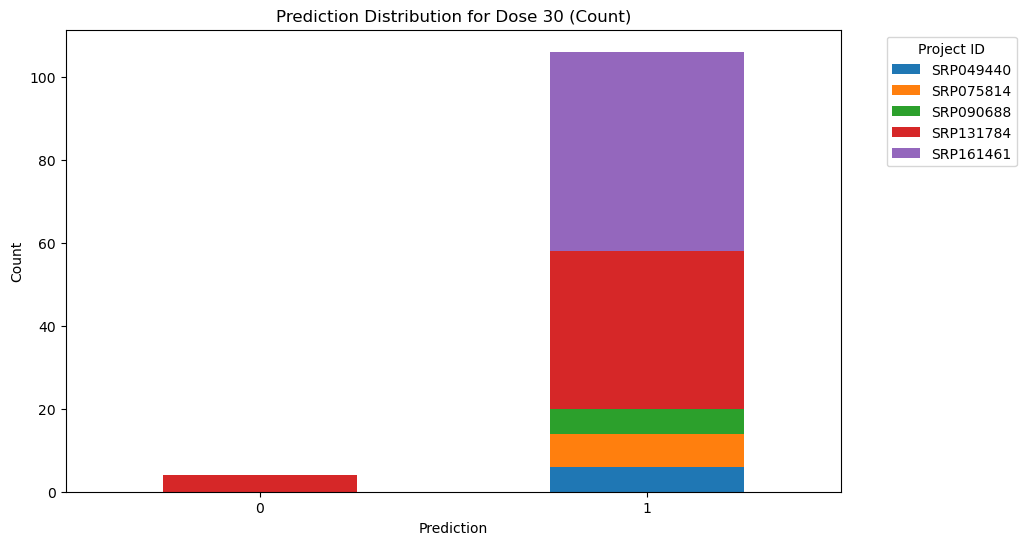

In [3]:
for dose in df['doses'].unique():
    subset = df[df['doses'] == dose]
    prediction_counts = subset.groupby(['prediction', 'project_ids']).size().unstack(fill_value=0)
    
    # 绘制堆叠柱状图
    ax = prediction_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    plt.title(f'Prediction Distribution for Dose {dose} (Count)')
    plt.xlabel('Prediction')
    plt.ylabel('Count')
    plt.legend(title='Project ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.show()


In [4]:
ig_0 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/ig_0030.txt', header=None, sep="\t")
ig_1 = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/ig_1030.txt', header=None, sep="\t")
edges = pd.read_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/GEO_model_training/input/edgeLabels.csv', header=None, sep=" ")
result = pd.concat([ig_0, ig_1, edges], axis=1)
result.columns = ["ig_0", "ig_1", "start", "end"]
print(result)

          ig_0      ig_1          start            end
0     0.013545  0.010442  R-MMU-9613507  R-MMU-9613545
1     0.078331  0.072480  R-MMU-9613545  R-MMU-9613562
2     0.020096  0.016658  R-MMU-9641089  R-MMU-9641096
3     0.069859  0.065105  R-MMU-9641096  R-MMU-9641111
4     0.035101  0.034382  R-MMU-9641111  R-MMU-9641127
...        ...       ...            ...            ...
6509  0.024545  0.021603  R-MMU-8856808  R-MMU-8856813
6510  0.034071  0.029437  R-MMU-8868651  R-MMU-8868648
6511  0.010998  0.010753  R-MMU-8868648  R-MMU-8868661
6512  0.019519  0.017282  R-MMU-8868660  R-MMU-8868658
6513  0.085103  0.079599  R-MMU-8863721  R-MMU-8863723

[6514 rows x 4 columns]


In [5]:
import pandas as pd

sorted_by_ig0 = result.sort_values(by='ig_0', ascending=False)

sorted_by_ig1 = result.sort_values(by='ig_1', ascending=False)

sorted_by_ig0.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/sorted_by_ig0030.csv', sep='\t', index=False)
sorted_by_ig1.to_csv('/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/tcdd/output/sorted_by_ig1030.csv', sep='\t',index=False)

